In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError, CategoricalCrossentropy
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_history(history):
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()




534
Epoch 1/30
14/14 [==============================] - 1s 84ms/step - loss: 71.4866 - val_loss: 48.1404
Epoch 2/30
14/14 [==============================] - 0s 6ms/step - loss: 66.4050 - val_loss: 43.7477
Epoch 3/30
14/14 [==============================] - 0s 7ms/step - loss: 60.4938 - val_loss: 38.0353
Epoch 4/30
14/14 [==============================] - 0s 5ms/step - loss: 55.1727 - val_loss: 34.3492
Epoch 5/30
14/14 [==============================] - 0s 5ms/step - loss: 51.3673 - val_loss: 31.3758
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 47.9911 - val_loss: 28.5389
Epoch 7/30
14/14 [==============================] - 0s 4ms/step - loss: 44.3300 - val_loss: 25.3260
Epoch 8/30
14/14 [==============================] - 0s 4ms/step - loss: 40.1708 - val_loss: 21.9306
Epoch 9/30
14/14 [==============================] - 0s 4ms/step - loss: 35.2456 - val_loss: 17.8375
Epoch 10/30
14/14 [==============================] - 0s 5ms/step - loss: 31.2827 - val_loss: 15

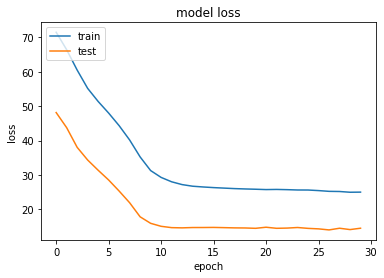

tf.Tensor(29.710790634155273, shape=(), dtype=float64)


In [6]:
# task 1
train_df = pd.read_csv('hourly_wages_data.csv')
print(len(train_df))

training_data = train_df.sample(frac=0.9, random_state=25)
testing_data = train_df.drop(training_data.index)

train_X = training_data.drop(columns=['wage_per_hour'])
train_y = training_data['wage_per_hour']

test_X = testing_data.drop(columns=['wage_per_hour'])
test_y = testing_data['wage_per_hour']

model = Sequential()

n_cols = train_X.shape[1]

model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

loss = MeanSquaredError()
optim = RMSprop()
model.compile(optimizer=optim,
              loss=loss)

early_stopping_monitor = EarlyStopping(patience=8)
history = model.fit(train_X, train_y, validation_split=0.07, epochs=30, callbacks=[early_stopping_monitor])
plot_history(history)
test_y_preds = model.predict(test_X)
print(loss(test_y_preds, test_y))




Epoch 1/30
18/18 [==============================] - 0s 19ms/step - loss: 0.6858 - accuracy: 0.6467 - val_loss: 0.6366 - val_accuracy: 0.6835
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6467 - val_loss: 0.6320 - val_accuracy: 0.6835
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6467 - val_loss: 0.6229 - val_accuracy: 0.6835
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6467 - val_loss: 0.6286 - val_accuracy: 0.6835
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6467 - val_loss: 0.6285 - val_accuracy: 0.6835
Epoch 6/30
18/18 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.6467 - val_loss: 0.6218 - val_accuracy: 0.6835
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6467 - val_loss: 0.6120 - val_accuracy: 0.6835
Epoch 8/30
18/18 [=

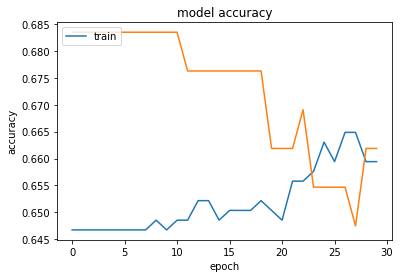

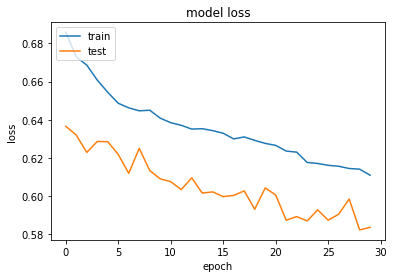

tf.Tensor(6.75439, shape=(), dtype=float32)


In [7]:
# task 2
train_df = pd.read_csv('diabetes_data.csv')

data = np.array(train_df)
pca = PCA(n_components=2)
pca.fit(data)
transformed = pca.transform(data)

training_data = train_df.sample(frac=0.9, random_state=25)
testing_data = train_df.drop(training_data.index)

train_X = training_data.drop(columns=['diabetes'])
train_y = to_categorical(training_data['diabetes'])

test_X = testing_data.drop(columns=['diabetes'])
test_y = to_categorical(testing_data['diabetes'])

model = Sequential()
n_cols = train_X.shape[1]

model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

loss = CategoricalCrossentropy()
optim = RMSprop()
model.compile(optimizer=optim,
loss=loss, metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=9)
history = model.fit(train_X, train_y, epochs=30, validation_split=0.2, callbacks=[])
plot_history(history)
test_y_preds = model.predict(test_X)
print(loss(test_y_preds, test_y))

   Unnamed: 0  velocity  spinrate  swing_miss
0           1        89      1600         4.8
1           2        90      1600         1.9
2           3        91      1600         7.9
3           4        93      1600         1.8
4           5        94      1600         5.6
5           6        88      1700         5.2
6           7        89      1700         2.0
7           8        90      1700         5.5
8           9        91      1700         4.1
9          10        92      1700         7.0
168
Epoch 1/30
5/5 [==============================] - 0s 47ms/step - loss: 8437.0156 - val_loss: 8429.9131
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 8410.7598 - val_loss: 8409.7207
Epoch 3/30
5/5 [==============================] - 0s 12ms/step - loss: 8391.6777 - val_loss: 8392.1055
Epoch 4/30
5/5 [==============================] - 0s 11ms/step - loss: 8374.4561 - val_loss: 8375.3125
Epoch 5/30
5/5 [==============================] - 0s 9ms/step - loss: 8357.826

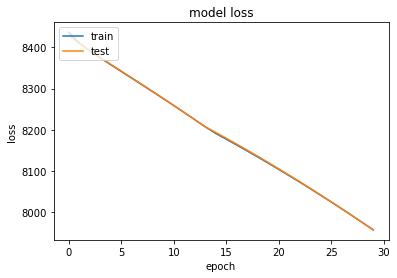

tf.Tensor(8166, shape=(), dtype=int64)


In [9]:
# task 3
train_df = pd.read_csv('spinrates.csv')
print(train_df.head(10))
print(len(train_df))

training_data = train_df.sample(frac=0.9, random_state=25)
testing_data = train_df.drop(training_data.index)

train_X = training_data.drop(columns=['velocity'])
train_y = training_data['velocity']

test_X = testing_data.drop(columns=['velocity'])
test_y = testing_data['velocity']

model = Sequential()

n_cols = train_X.shape[1]

model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

loss = MeanSquaredError()
optim = RMSprop()
model.compile(optimizer=optim,
              loss=loss)

early_stopping_monitor = EarlyStopping(patience=3)
history = model.fit(train_X, train_y, validation_split=0.07, epochs=30, callbacks=[early_stopping_monitor])
plot_history(history)
test_y_preds = model.predict(test_X)
print(loss(test_y_preds, test_y))